# Integration with Simpson's rule
In this notebook we look at a more efficient method for numerical integraiton: Simpon's rule

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Illustration of Simpson's rule

Simpson's rule fits a quadratic to each strip of the integrand. The equation for the quadratic can be found by using Lagrange polynomial formula, using values of the function at the left, middle and right of the strip. The resulting formula for the integral of each strip is:

$$ I_i = \frac{\Delta x}{6} \left[f(x_i) + 4 f((x_i + x_{i+1})/2) + f(x_{i+1}) \right] $$

In [9]:
# For the arguements: 
#     x is the data point (or array of points) to evaluate the intepolaring polynomial at
#     data is the data to be interpolated
def LagrangePoly(x, data):
    n = data.shape[0] - 1
    i = 1
    fn = 0
    while i <= n + 1:
        j = 1
        Li = 1
        while j <= n+1:
            if(j == i):
                j += 1
                continue
            Li *= (x - data[j-1,0])/(data[i-1,0] - data[j-1,0])
            j += 1
        fn += data[i-1,1]*Li
        i += 1
    return fn

In [10]:
def SimpsonsIntegrate(f, a, b, N, plotMethod=False):
    dx = (b-a)/N
    xi = a
    area = 0
    i = 0
    while i < N:
        if(plotMethod):
            x1 = xi
            x2 = x1 + dx
            x3 = (x1+x2)/2 

            f1 = f(x1)
            f2 = f(x2)
            f3 = f(x3)

            LagrangePoly
            x = np.linspace(x1, x2, 100)
            y = LagrangePoly(x, np.array([[x1, f1], [x2, f2], [x3, f3]]))
            plt.plot(x,y , color='red')
            plt.vlines(xi, 0, f1 , color= 'red')
        
        # The below line applies Simpson's rule
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        
        xi += dx
        i += 1
        
    if(plotMethod):
        plt.vlines(b, 0, f(b) , color= 'red')
        x = np.linspace(a,b,100)
        y = f(x)
        plt.plot(x,y);
        
    return area

In [11]:
def f(x):
    return np.sin(x) + 2

21.839729612495127

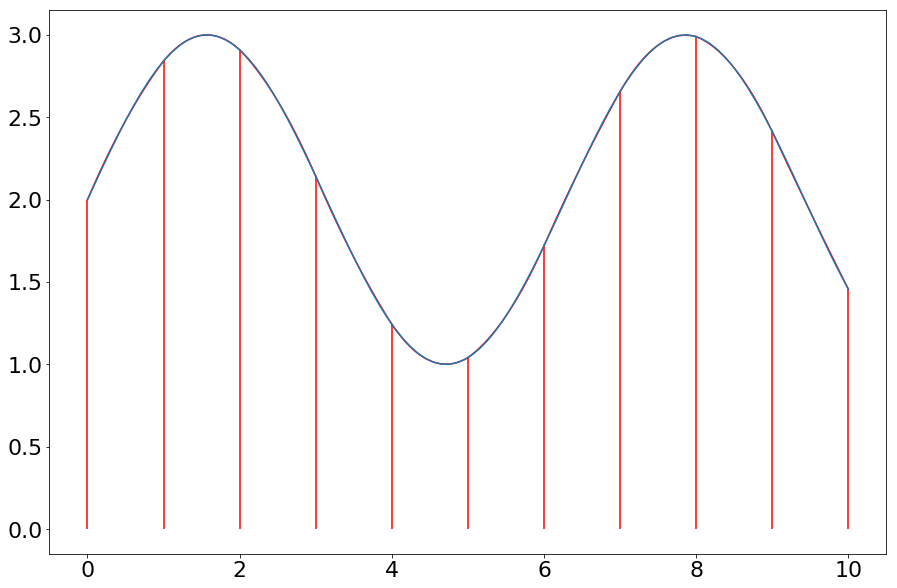

In [12]:
SimpsonsIntegrate(f, 0, 10, 10, True)

# A generic integrator with different methods

Below is a function that can use all 3 methods we've looked at.

In [13]:
def NIntegrate(f, a, b, N, method='Simpsons'):
    dx = (b-a)/N
    xi = a
    i = 0
    area = 0
    while i < N:
        if(method == 'Simpsons'):
            area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        elif(method == 'midpoint'):
            area += dx * f(xi+dx/2)
        elif(method == 'trapezoidal'):
            area += dx/2 * (f(xi) + f(xi+dx))
        xi += dx
        i+= 1
    return area

In [14]:
def f(x):
    return np.sin(x)

In [22]:
I = 1 - np.cos(4)
print("I = %.12f" % I)
print("Midpoint: I = %.12f" % NIntegrate(f, 0, 4, 10, 'midpoint'))
print("Trapezoidal: I = %.12f" % NIntegrate(f, 0, 4, 10, 'trapezoidal'))
print("Simpson's: I = %.12f" % NIntegrate(f, 0, 4, 10, 'Simpsons'))

I = 1.653643620864
Midpoint: I = 1.664719576238
Trapezoidal: I = 1.631536018149
Simpson's: I = 1.653658390209


Let's now plot the convergence rate of the methods. Recall from the lectures we expect the error to scale as:

$$     \begin{align*}
      \epsilon_{trap} 
      &\le \frac{M (b-a)}{12} \Delta x^2
      & \epsilon_{mid}
      &\le \frac{M (b-a)}{24} \Delta x^2
      &\epsilon_{simp} 
      &\le \frac{M (b-a)}{180} \Delta x^4
    \end{align*}
    $$

In [24]:
imax = 10;

errMidpoint = np.empty((imax,2))
errTrap     = np.empty((imax,2))
errSimpsons = np.empty((imax, 2))

i = 0
N = 10
while i < imax:
    errMidpoint[i,0] = N
    errMidpoint[i,1] = np.abs(NIntegrate(f, 0, 4, N, 'midpoint') - I)
    
    errTrap[i, 0] = N
    errTrap[i, 1] = np.abs(NIntegrate(f, 0, 4, N, 'trapezoidal') - I)
    
    errSimpsons[i, 0] = N
    errSimpsons[i, 1] = np.abs(NIntegrate(f, 0, 4, N, 'Simpsons') - I)
    
    N *= 2
    i += 1

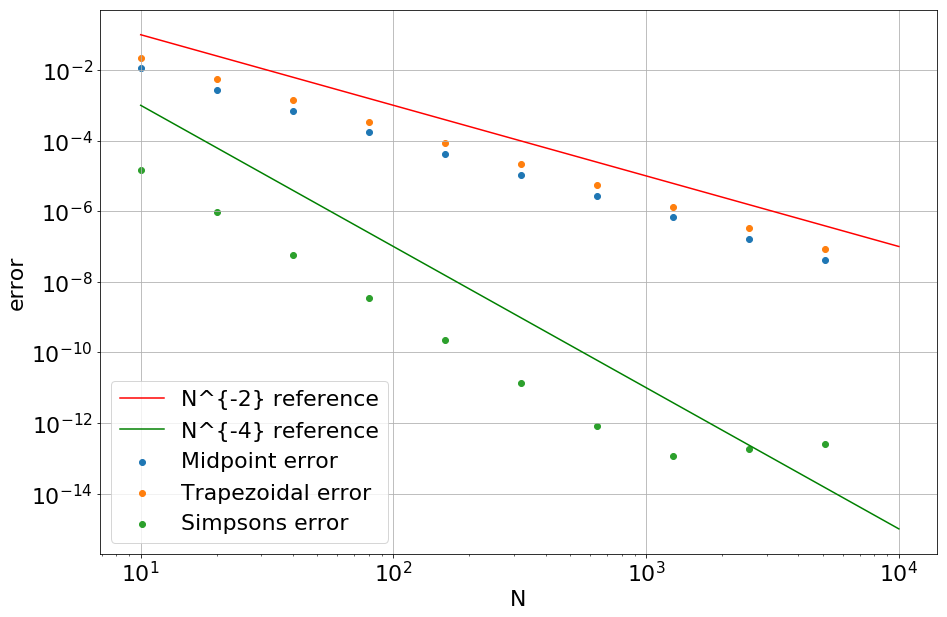

In [27]:
x = np.linspace(10,1e4)
N2ref = 10*x**-2
N4ref = 10*x**-4



plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.scatter(errMidpoint[:,0], errMidpoint[:,1]);
plt.scatter(errTrap[:,0], errTrap[:,1]);
plt.scatter(errSimpsons[:,0], errSimpsons[:,1]);
plt.plot(x,N2ref, color='red')
plt.plot(x,N4ref, color='green')

plt.legend(['N^{-2} reference','N^{-4} reference','Midpoint error', 'Trapezoidal error', 'Simpsons error']);

Looks like the code scales as expected. This is a good test on the code.